# Задача №7

1. Сравнить распределение длин слов на русском, французском и английском языке на примере романа "Анна Каренина". Полагать, что длины слов распределены по распределению Пуассона.

2. Сравнить распределение длин слов на русском языке для разных жанров. В качестве второго жанра взять новости.

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
import pandas as pd
import re
from collections import Counter
import os
import codecs

## Часть 1

Введём функции чтения текста, подсчёта количество слов по длинам, создания списка слов для построения гистограммы, графика распределения длин слов, и что-то ещё.

In [2]:
def get_text(path):
    text = open(path, 'r').read().lower()
    wordList = re.sub("[^\w'’]", " ",  text).split()
    print("{} length - {} words".format(os.path.split(path)[-1],len(wordList)))
    return wordList

In [3]:
def count_length(wordList):
    cnt_length = Counter()
    for word in wordList:
        cnt_length[len(word)] += 1
    print(cnt_length)
    return cnt_length

In [4]:
def arr_for_hist(wordList):
    length = []
    for word in wordList:
        length.append(len(word))
    return length

In [5]:
def arr_for_plot(counter):
    arr = np.zeros(25)
    for i,val in counter.items():
        arr[i] = val
    return arr

In [6]:
def corr_to_DataFrame(func, arrays, idx=''):
    N = len(arrays)
    if idx == '':
        idx = np.arange(N)
    _data = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i != j:
                _data[i,j] = func(arrays[i], arrays[j])[1]
    return pd.DataFrame(_data, index=idx, columns=idx)

Работа с текстами на русском, английском и французском.

In [8]:
text_ru = get_text('./Anna_ru.txt')
length_ru = count_length(text_ru)
length_plot_ru = arr_for_plot(length_ru)
length_hist_ru = arr_for_hist(text_ru)

Anna_ru.txt length - 271237 words
Counter({3: 37939, 2: 35844, 5: 31355, 1: 31091, 6: 30608, 4: 26711, 7: 24668, 8: 18930, 9: 12850, 10: 8960, 11: 5338, 12: 3122, 13: 2311, 14: 857, 15: 342, 16: 173, 17: 66, 18: 46, 19: 13, 20: 5, 21: 4, 22: 3, 23: 1})


In [9]:
text_en = get_text('./Anna_en.txt')
length_en = count_length(text_en)
length_plot_en = arr_for_plot(length_en)
length_hist_en = arr_for_hist(text_en)

Anna_en.txt length - 352267 words
Counter({3: 92048, 4: 63986, 2: 59389, 5: 38316, 6: 26048, 7: 24744, 8: 15252, 1: 10131, 9: 9118, 10: 6419, 11: 2543, 12: 2436, 14: 850, 13: 755, 15: 145, 16: 78, 17: 7, 19: 2})


In [10]:
text_fr = get_text('./Anna_fr.txt')
length_fr = count_length(text_fr)
length_plot_fr = arr_for_plot(length_fr)
length_hist_fr = arr_for_hist(text_fr)

Anna_fr.txt length - 126908 words
Counter({2: 30487, 4: 18624, 3: 17187, 5: 14321, 7: 11334, 6: 11177, 8: 7738, 9: 5027, 1: 3526, 10: 3387, 11: 1769, 12: 1219, 13: 523, 14: 420, 16: 76, 15: 75, 17: 14, 18: 4})


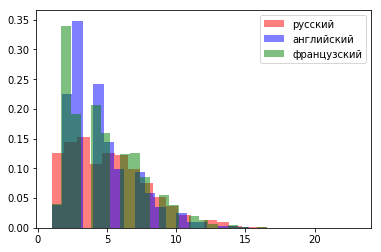

In [11]:
_ = plt.hist(length_hist_ru, bins = 24, color = 'r', alpha = 0.5, density = True, label = 'русский')
_ = plt.hist(length_hist_en, bins = 24, color = 'b', alpha = 0.5, density = True, label = 'английский')
_ = plt.hist(length_hist_fr, bins = 24, color = 'g', alpha = 0.5, density = True, label = 'французский')
_ = plt.legend(loc = 'best')

Из гистограммы видно, что распределения всех трёх выборок похоже на пуассоновское.

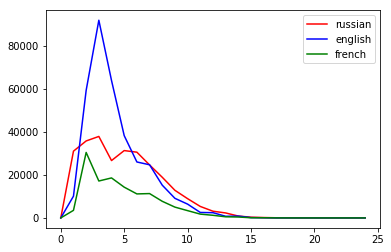

In [12]:
plt.plot(length_plot_ru, color='r', label='russian')
plt.plot(length_plot_en, color='b', label='english')
plt.plot(length_plot_fr, color='g', label='french')
_=plt.legend(loc='best')

Так как количество слов сильно отличаются в данных текстах, отнормируем данные и снова построим график.

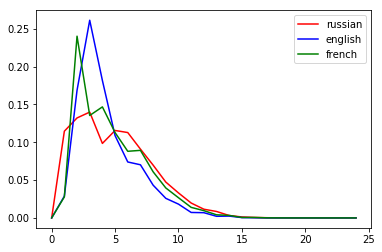

In [13]:
arr_ru_norm = length_plot_ru/np.sum(length_plot_ru)
arr_en_norm = length_plot_en/np.sum(length_plot_en)
arr_fr_norm = length_plot_fr/np.sum(length_plot_fr)
plt.plot(arr_ru_norm, color='r', label='russian')
plt.plot(arr_en_norm, color='b', label='english')
plt.plot(arr_fr_norm, color='g', label='french')
_=plt.legend(loc='best')

Рассмотрим, есть ли статистическая взаимосвязь между данными (одна таблица при коэффициенте корреляции Пирсона, Кендалла, Спирмена). Выведем в таблицу значения p-value.

In [14]:
corr_to_DataFrame(st.pearsonr, (arr_en_norm, arr_ru_norm, arr_fr_norm), ('en','ru','fr'))

,en,ru,fr
en,0.000000e+00,8.853615e-08,1.894121e-09
ru,8.853615e-08,0.000000e+00,1.282010e-08
fr,1.894121e-09,1.282010e-08,0.000000e+00


In [15]:
corr_to_DataFrame(st.kendalltau, (arr_en_norm, arr_ru_norm, arr_fr_norm), ('en','ru','fr'))

,en,ru,fr
en,0.000000e+00,6.729624e-10,7.765788e-10
ru,6.729624e-10,0.000000e+00,1.219015e-09
fr,7.765788e-10,1.219015e-09,0.000000e+00


In [16]:
corr_to_DataFrame(st.spearmanr, (arr_en_norm, arr_ru_norm, arr_fr_norm), ('en','ru','fr'))

,en,ru,fr
en,0.000000e+00,7.135659e-16,6.445985e-18
ru,7.135659e-16,0.000000e+00,3.044085e-15
fr,6.445985e-18,3.044085e-15,0.000000e+00


Все значения p-value меньше $10^{-8}$, значит мы отвергаем гипотезу, что выборки не коррелируют.

Проверим критерием Колмогорова-Смирнова гипотезу о равенстве распределений.

In [17]:
corr_to_DataFrame(st.ks_2samp, (arr_en_norm, arr_ru_norm, arr_fr_norm), ('en','ru','fr'))

,en,ru,fr
en,0.000000,0.648524,0.999994
ru,0.648524,0.000000,0.648524
fr,0.999994,0.648524,0.000000


Исходя из значений p-value, гипотезу о равенстве распределений отвергнуть не можем.

## Часть 2

Считаем текст с новостями.

In [18]:
text_news = get_text('./news.txt')
length_news = count_length(text_news)
length_plot_news = arr_for_plot(length_news)
length_hist_news = arr_for_hist(text_news)

news.txt length - 588238 words
Counter({6: 66698, 7: 63376, 5: 60228, 1: 59966, 2: 54728, 8: 52011, 3: 47693, 9: 42726, 4: 40385, 10: 33918, 11: 24843, 12: 16766, 13: 11630, 14: 6655, 15: 3302, 16: 1522, 17: 851, 18: 524, 19: 185, 20: 143, 21: 70, 22: 14, 23: 2, 24: 2})


Построим гистограмму и график распределения длин слов ненормированный и нормированный.

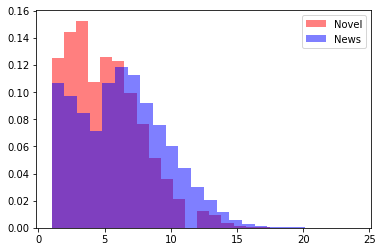

In [20]:
_ = plt.hist(length_hist_ru, bins = 24, color = 'r', alpha = 0.5, density = True, label = 'Novel')
_ = plt.hist(length_hist_news, bins = 24, color = 'b', alpha = 0.5, density = True, label = 'News')
_ = plt.legend(loc = 'best')

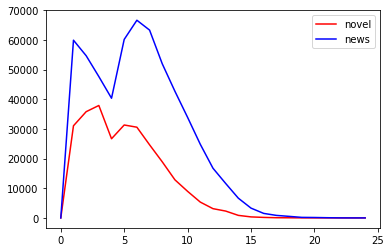

In [21]:
plt.plot(length_plot_ru, color='r', label='novel')
plt.plot(length_plot_news, color='b', label='news')
_=plt.legend(loc='best')

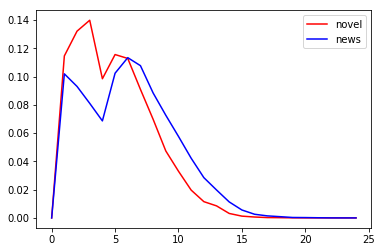

In [22]:
arr_news_norm = length_plot_news/np.sum(length_plot_news)
plt.plot(arr_ru_norm, color='r', label='novel')
plt.plot(arr_news_norm, color='b', label='news')
_=plt.legend(loc='best')

По графику видно, что распределения схожи. Проверим гипотезы о корреляции выборок(Пирсон, Кендалл, Спирмен), а также гипотезу о равенстве распределений.

In [23]:
pearson = st.pearsonr(arr_ru_norm, arr_news_norm)
kendall = st.kendalltau(arr_ru_norm, arr_news_norm)
spearman = st.spearmanr(arr_ru_norm, arr_news_norm)
ks_norm = st.ks_2samp(arr_ru_norm, arr_news_norm)
print('r = {}\np = {}\ntau = {}\nks_norm = {}'.format(pearson[1], kendall[1],spearman[1],ks_norm[1]))

r = 2.088195079542186e-11
p = 6.869199230573021e-10
tau = 2.509985707021042e-14
ks_norm = 0.8774132527980119


Гипотезу об отсутствии корреляции отвернули(p-value меньше $10^{-9}$).

Гипотезу о равенстве распределений отвергнуть не можем.